# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022

## Libraries and datasets

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.ndimage import gaussian_filter1d

from t3_constants import *
from t3_utility import *

# KNN
## Training

In [2]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'rb') as f:
    train_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'rb') as f:
    train_y = pickle.load(f)

In [3]:
# dictionary of parameters of model
param_d = {
    'n_neighbors' : range(1,50),
    'weights_options' : ['uniform', 'distance']
}
# iteration on parameters to collect results
grid = itertools.product(*[param_d[key] for key in sorted(param_d)])
results = []
for n, weights in grid:
    model = KNeighborsClassifier(n_neighbors=n, weights=weights)
    mean_val_score, std_val_score = cross_validation_summary(model, train_x.values, train_y.values)
    res = weights, n, mean_val_score, std_val_score
    results.append(res)

df = pd.DataFrame(results, columns=['weights', 'n_neighbors', 'mean_val_score', 'std_val_score'])

In [4]:
# Hyper-parameters sorted by performance
df.sort_values('mean_val_score', ascending=False).head(10)

,weights,n_neighbors,mean_val_score,std_val_score
63,distance,32,0.928127,0.020814
49,distance,25,0.928102,0.016052
47,distance,24,0.928102,0.018975
71,distance,36,0.926527,0.018479
59,distance,30,0.926514,0.031766
57,distance,29,0.926502,0.023448
53,distance,27,0.926489,0.024013
65,distance,33,0.924927,0.021199
51,distance,26,0.924914,0.020634
61,distance,31,0.924914,0.019353


In [5]:
df.groupby('weights').mean()

,n_neighbors,mean_val_score,std_val_score
weights,,,
distance,25.0,0.916410,0.021864
uniform,25.0,0.906881,0.025169


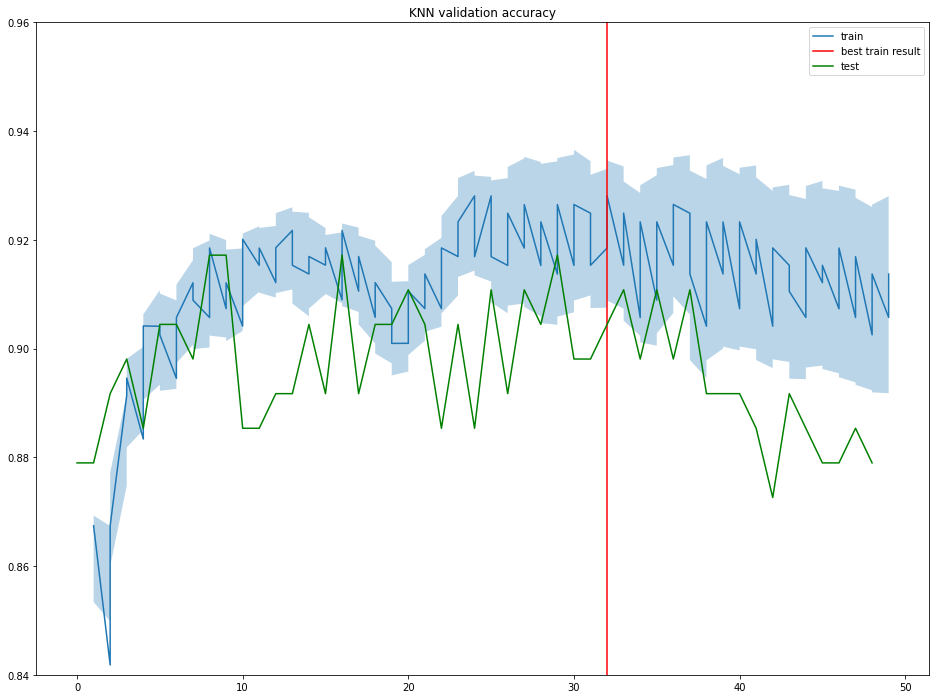

In [6]:

tmp = df.sort_values('n_neighbors')
# plt.errorbar(tmp.n_neighbors, tmp.mean_val_score, tmp.std_val_score)
plt.figure(figsize=(16,12))
plt.plot(tmp.n_neighbors, tmp.mean_val_score, label='train')
lower_bound = tmp.mean_val_score - tmp.std_val_score/2
upper_bound = tmp.mean_val_score + tmp.std_val_score/2
lower_bound = gaussian_filter1d(lower_bound, 1)
upper_bound = gaussian_filter1d(upper_bound, 1)
plt.fill_between(tmp.n_neighbors, lower_bound, upper_bound, alpha=.3)
plt.plot([32,32], [0,1], color='r', label='best train result')
plt.ylim([0.84,0.96])

test_val = []
for i in range(1,50):
    test_knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    test_knn.fit(train_x, train_y)
    test_val.append(test_knn.score(test_x, test_y))

plt.plot(test_val, color='g', label='test')
plt.title('KNN validation accuracy')
plt.legend()
plt.show()

## Testing

In [ ]:
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'rb') as f:
    test_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'rb') as f:
    test_y = pickle.load(f)

### Score

test_model.score(test_x, test_y)